In [104]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import rcParams
from scipy.ndimage.interpolation import rotate, zoom
import scipy as sp
import cv2
%matplotlib inline

In [213]:
def getImgMass(im):
    
    height, width = im.shape[0], im.shape[1]
    axes = [np.arange(height).astype('float32').repeat(width).reshape(height,width),
            np.arange(width).astype('float32').repeat(height).reshape(width,height).T]
    
    #Calculate centers of mass for color channels
    mass= [im[:,:,col].sum() for col in range(3)]
    m  =  [[(im[:,:,col]*axes[i]).sum()/mass[col] for i in range(2)] for col in range(3)]

    #Calculate second moments for red channel;
    mm =  [[(im[:,:,0]*axes[i]*axes[j]).sum()/mass[0] - m[0][i]*m[0][j]
             for i in range(2)]
             for j in range(2)]
    
    # If there is no green channel then make its centroid == red centroid for rotation purposes
    for i in range(len(m)):
        m[i] = m[i][::-1]
        if any([np.isnan(x) for x in m[i]]) == True:
            m[i] = m[0]
    
    return m,mm

class imgCropRotate():
    def __init__(self,imgPath,level,justRed,thresh=50,levelCropDict={1:600,2:200,3:100},figsize=(20,10)):
        self.levelCropDict = levelCropDict
        self.imgPath = imgPath
        self.level = level
        levelName = "w" + str(level) + "_"
        maskName = imgPath.replace(levelName,"m"+str(level)+"_")
        self.dstPath = imgPath.replace(levelName,"w"+str(level+1)+"_")
        assert level, "Please specify which image level"
        x,mask = Image.open(imgPath), Image.open(maskName)
        w, h = x.size

        self.mask = np.array(mask.resize((w,h)))
        
        x = np.array(x)
        self.mask[self.mask<=threshold] = 0
        self.x = x
        #self.mask = maskThr
        self.figsize = figsize
        self.mask.shape
        
        if justRed == 1: #I.e. just the head
            r = self.mask
            notRed = (r[:,:,0] < 150) | (r[:,:,1] > 150) | (r[:,:,2] > 150)
            r[notRed] = 0
            self.mask = r
            

        self.m, self.mm = getImgMass(self.mask)
        
        
    def show(self):
        plt.figure(figsize=self.figsize)
        toDis = np.hstack((self.x,self.mask))
        plt.title("Original and mask")
        plt.imshow(toDis)
        plt.show()

    def showCentroids(self):
        cpy = self.x.copy()
        for i in range(2):
            if i == 1:
                c = (255,255,0)
            else:
                c = (255,0,0)
            cv2.circle(cpy,tuple(map(int,self.m[i])),150 + i*50,c,40)
            plt.imshow(cpy)
        plt.show()

    def crop(self,save,show=0):
        


        try:
            mx, my = map(int,self.m[0])
            w2Dict = self.levelCropDict
            w2 = w2Dict[self.level]
            x1 = mx-w2
            y2 = my+w2
            y1 = my-w2
            x2 = mx+w2

            cropped = self.x
            cropped = cropped[y1:y2,x1:x2]
            cropped = Image.fromarray(cropped)
            
  
            print(self.dstPath)
            if save == 1:
                cropped.save(self.dstPath)
            
            if show == 1:
                plt.imshow(cropped)
                plt.title(self.imgPath)
                plt.show()
                
        except ValueError:
            plt.title(imgPath + " (COULDN'T CROP)")
            plt.imshow(np.hstack((self.x,self.mask)))
            plt.show()


In [214]:
test = False
if test == False:
    mid = "whale_*" # not test
else:
    mid = "*"
#mid = "whale_36648"
level1 = glob.glob("../imgs/"+mid+"/w1_*") # 1 First 
level2 = glob.glob("../imgs/"+mid+"/w2_*")  # 2 Second
level3 = glob.glob("../imgs/"+mid+"/w3_*")  # 3 Second
print(level1[:10],level2[:10],level3[:10])

(['../imgs/whale_36648/w1_4292.jpg', '../imgs/whale_36648/w1_1007.jpg', '../imgs/whale_36648/w1_8511.jpg', '../imgs/whale_11099/w1_8061.jpg', '../imgs/whale_11099/w1_7731.jpg', '../imgs/whale_11099/w1_3538.jpg', '../imgs/whale_11099/w1_5304.jpg', '../imgs/whale_11099/w1_5512.jpg', '../imgs/whale_11099/w1_6252.jpg', '../imgs/whale_11099/w1_7627.jpg'], ['../imgs/whale_36648/w2_4292.jpg', '../imgs/whale_36648/w2_8511.jpg', '../imgs/whale_36648/w2_1007.jpg', '../imgs/whale_11099/w2_7627.jpg', '../imgs/whale_11099/w2_5688.jpg', '../imgs/whale_11099/w2_8061.jpg', '../imgs/whale_11099/w2_5512.jpg', '../imgs/whale_11099/w2_7987.jpg', '../imgs/whale_11099/w2_6252.jpg', '../imgs/whale_11099/w2_5616.jpg'], [])


0 of 4543


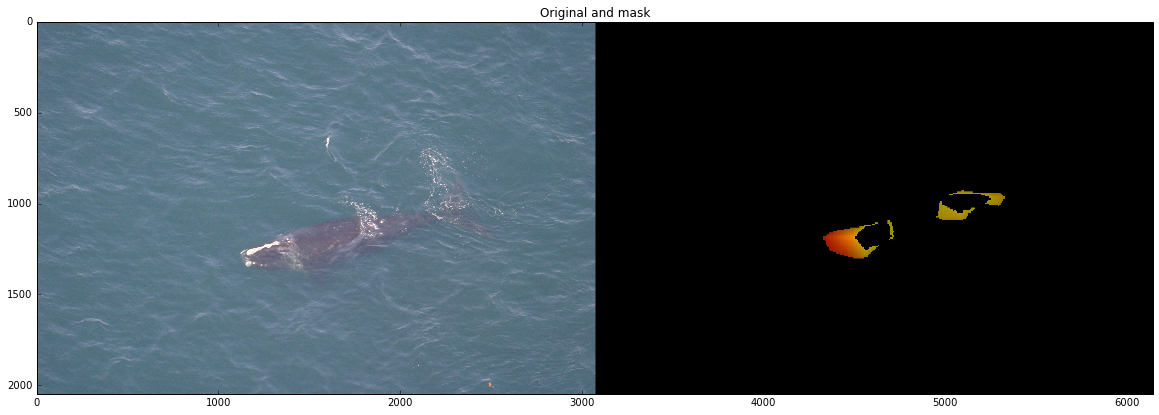

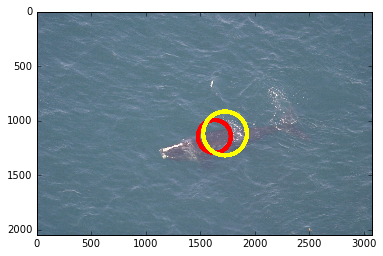

../imgs/whale_36648/w2_4292.jpg


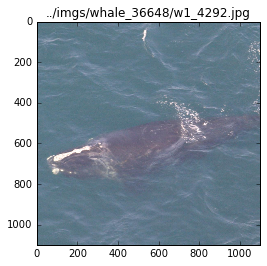

../imgs/whale_36648/w2_1007.jpg
../imgs/whale_36648/w2_8511.jpg
../imgs/whale_11099/w2_8061.jpg
../imgs/whale_11099/w2_7731.jpg
../imgs/whale_11099/w2_3538.jpg
../imgs/whale_11099/w2_5304.jpg
../imgs/whale_11099/w2_5512.jpg
../imgs/whale_11099/w2_6252.jpg
../imgs/whale_11099/w2_7627.jpg
../imgs/whale_11099/w2_7628.jpg
../imgs/whale_11099/w2_2450.jpg
../imgs/whale_11099/w2_5688.jpg
../imgs/whale_11099/w2_3653.jpg
../imgs/whale_11099/w2_5616.jpg
../imgs/whale_11099/w2_7987.jpg


In [ ]:
imgPaths = level1
level = 1
justRed = 1
threshold = 0
levelCropDict={1:550,2:200,3:100}

for i in range(nObs)[:]:
    imgPath = imgPaths[i]
    im = imgCropRotate(imgPath,level,justRed,levelCropDict=levelCropDict, thresh=threshold)
    show = 0
    if i % 500 == 0:
        print("%d of %d" %(i,nObs))
        show = 1
        im.show()
        im.showCentroids()


    im.crop(save=1,show=show)
   